**Çok Dilli Duygu Analizi**

In [1]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [2]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

print(classifier("Bu ürünü çok beğendim!"))
print(classifier("C'est un mauvais service."))
print(classifier("Das ist fantastisch!"))



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


[{'label': '5 stars', 'score': 0.7120857834815979}]
[{'label': '1 star', 'score': 0.7949011921882629}]
[{'label': '5 stars', 'score': 0.8447275161743164}]


**Çok Dilli Yorum Analizi ve İstatistiksel Özet**

Device set to use cpu


Yorumlar ve tahmin edilen yıldızlar:

'Bu ürün gerçekten harika, herkese tavsiye ederim.' ➜ 5 stars (0.48)
'C'est un très mauvais produit, je suis déçu.' ➜ 1 star (0.79)
'This is okay, not bad but not great either.' ➜ 3 stars (0.87)
'Fantastisches Erlebnis, würde es wieder kaufen!' ➜ 5 stars (0.87)
'No me gustó este producto, esperaba más.' ➜ 2 stars (0.63)

Yıldız dağılımı:
1 yıldız: 1 yorum
2 yıldız: 1 yorum
3 yıldız: 1 yorum
4 yıldız: 0 yorum
5 yıldız: 2 yorum


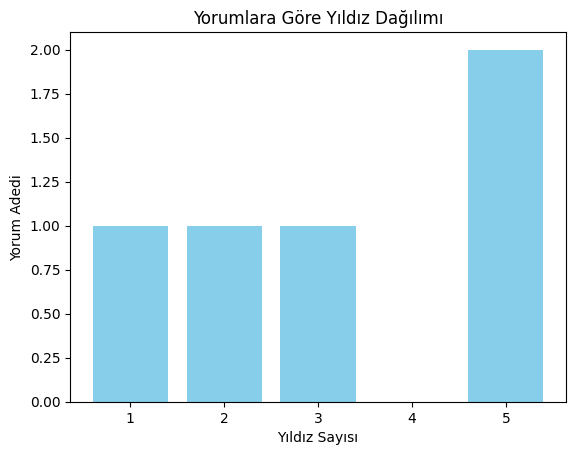

In [3]:
from transformers import pipeline
from collections import Counter
import matplotlib.pyplot as plt


classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


reviews = [
    "Bu ürün gerçekten harika, herkese tavsiye ederim.",
    "C'est un très mauvais produit, je suis déçu.",
    "This is okay, not bad but not great either.",
    "Fantastisches Erlebnis, würde es wieder kaufen!",
    "No me gustó este producto, esperaba más."
]


results = classifier(reviews)


stars = [int(res['label'][0]) for res in results]


counter = Counter(stars)


print("Yorumlar ve tahmin edilen yıldızlar:\n")
for review, res in zip(reviews, results):
    print(f"'{review}' ➜ {res['label']} ({round(res['score'], 2)})")


print("\nYıldız dağılımı:")
for i in range(1, 6):
    print(f"{i} yıldız: {counter.get(i, 0)} yorum")

plt.bar(counter.keys(), counter.values(), color='skyblue')
plt.xlabel("Yıldız Sayısı")
plt.ylabel("Yorum Adedi")
plt.title("Yorumlara Göre Yıldız Dağılımı")
plt.xticks([1, 2, 3, 4, 5])
plt.show()


**Çok Dilli Metin Çevirisi**



In [1]:
pip install googletrans==4.0.0-rc1


In [2]:
from googletrans import Translator

translator = Translator()

text = "I am learning natural language processing."


translated = translator.translate(text, src="en", dest="tr")


print("Çeviri sonucu:", translated.text)


Çeviri sonucu: Doğal dil işleme öğreniyorum.


**nllb-200-distilled modeli**

In [3]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "facebook/nllb-200-distilled-600M"

tokenizer = AutoTokenizer.from_pretrained(model_name, src_lang="eng_Latn")
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


text = "I am learning natural language processing."


inputs = tokenizer(text, return_tensors="pt")

target_lang_token = tokenizer.convert_tokens_to_ids("tur_Latn")

generated_tokens = model.generate(
    **inputs,
    forced_bos_token_id=target_lang_token
)

translation = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
print("Çeviri:", translation[0])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

Çeviri: Doğal dil işlemeyi öğreniyorum.


**Çoklu Metin Çevirisi (ingilizce->türkçe)**

In [4]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM


model_name = "facebook/nllb-200-distilled-600M"
tokenizer = AutoTokenizer.from_pretrained(model_name, src_lang="eng_Latn")
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


sentences = [
    "I love working with artificial intelligence.",
    "This movie was boring and too long.",
    "Can you help me with my homework?",
    "Natural language processing is a fascinating field.",
    "We are planning a trip to Istanbul next month."
]


target_lang_token_id = tokenizer.convert_tokens_to_ids("tur_Latn")

translated_sentences = []

for sentence in sentences:
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model.generate(**inputs, forced_bos_token_id=target_lang_token_id)
    translation = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]
    translated_sentences.append((sentence, translation))


print("İngilizce → Türkçe Çeviriler:\n")
for eng, tr in translated_sentences:
    print(f"{eng} ➜ {tr}")

İngilizce → Türkçe Çeviriler:

I love working with artificial intelligence. ➜ Yapay zeka ile çalışmayı seviyorum.
This movie was boring and too long. ➜ Bu film sıkıcı ve çok uzunydu.
Can you help me with my homework? ➜ Ev ödevimi yapmama yardım edebilir misin?
Natural language processing is a fascinating field. ➜ Doğal dil işleme büyüleyici bir alan.
We are planning a trip to Istanbul next month. ➜ Gelecek ay İstanbul'a bir yolculuk planlıyoruz.


**Kullanıcı Girişi + Çeviri + Gelişmiş Çıktı Formatı**

In [5]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "facebook/nllb-200-distilled-600M"
tokenizer = AutoTokenizer.from_pretrained(model_name, src_lang="eng_Latn")
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


print("İngilizce cümleleri girin (her satıra bir cümle, bitince 'bitti' yazın):\n")
sentences = []
while True:
    line = input()
    if line.strip().lower() == "bitti":
        break
    if line.strip():
        sentences.append(line.strip())


target_lang_token_id = tokenizer.convert_tokens_to_ids("tur_Latn")

print("\n📄 Çeviri Sonuçları:\n")
for sentence in sentences:
    inputs = tokenizer(sentence, return_tensors="pt")
    output = model.generate(**inputs, forced_bos_token_id=target_lang_token_id)
    translation = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
    print(f"🟦 EN: {sentence}")
    print(f"🟨 TR: {translation}")
    print("-" * 40)

İngilizce cümleleri girin (her satıra bir cümle, bitince 'bitti' yazın):

hello
bitti

📄 Çeviri Sonuçları:

🟦 EN: hello
🟨 TR: Merhaba .
----------------------------------------
